# Домашнее задание 1

__Оценки-баллы__: 
- 1: 1-2
- 2: 3-6
- 3: 7-9
- 4: 10-13
- 5: 14-16
- 6: 17-19
- 7: 20-22
- 8: 23-26
- 9: 27-29
- 10: 30-32

__Литература__: 

- 1) An Introduction to Statistical Learning - облегченная версия следующей книги с небольшим количеством матана, примеры реализованы на R. Электронная версия книги - бесплатная: http://faculty.marshall.usc.edu/gareth-james/

По этой книге также есть онлайн-курс от Стенфорда

- 2)The Elements of Statistical Learning - полный классический учебник по статистическому обучению, много математики. Книга, кстати, тоже бесплатна для скачивания: https://web.stanford.edu/~hastie/ElemStatLearn//


__DL (срок сдачи ДЗ)__: 15.10.2021 23:59. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw1_3_ivanov_i_i.ipynb

In [336]:
import warnings
warnings.filterwarnings("ignore")

### Описательные статистики

In [337]:
import pandas as pd
%matplotlib inline 

Подгрузим данные и посмотрим на первые пять строчек из таблицы.

In [338]:
df = pd.read_csv('./vk_main.csv', sep='\t')
df.head()

,city,country,first_name,home_town,in_hse_memes_group,is_bmm,is_closed,last_name,likes_memes,uid,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
0,Москва,Россия,Александра,Москва,True,True,False,Абашкова,60.0,182152789,...,1.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,42.0,0.428571
1,Рязань,Россия,Анастасия,Рязань,True,True,False,Чуфистова,0.0,148020433,...,2.375000,2.0,1.0,0.105263,0.0,0.0,0.0,0.0,32.0,0.281250
2,Москва,Россия,Александр,Омск,False,True,False,Головачев,0.0,138413935,...,1.400000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,32.0,0.406250
3,NaN,NaN,Анна,NaN,False,True,False,Лобанова,0.0,366261055,...,4.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,45.0,0.333333
4,NaN,Россия,Алексей,NaN,True,True,False,Пузырный,21.0,111252392,...,3.181818,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,41.0,0.341463


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 98 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   city                             328 non-null    object 
 1   country                          364 non-null    object 
 2   first_name                       425 non-null    object 
 3   home_town                        112 non-null    object 
 4   in_hse_memes_group               425 non-null    bool   
 5   is_bmm                           425 non-null    bool   
 6   is_closed                        425 non-null    bool   
 7   last_name                        425 non-null    object 
 8   likes_memes                      384 non-null    float64
 9   uid                              425 non-null    int64  
 10  male_dummy                       425 non-null    int64  
 11  facebook_dummy                   425 non-null    int64  
 12  instagram_dummy       

#### Задание 1 [2]

В переменной `wall_text` лежат тексты со стен всех пользователей.

* Постройте распределение длин для всех стен. 
* Сколько людей написали на своей стенке хотя бы раз название своего вуза?


In [340]:
df.wall_text.head()

0         Давай поговорим о личном   Буду вашим кот...
1        Лучший фотограф😻😻        ой,  может даже у...
2    🚀 [id18115779|Баха], спасибо за атмосферу 🌌 \n...
3    Не проходите мимо! Приходите к нам! Ждём всех!...
4    Нам пора признать, что зимний сезон следует сд...
Name: wall_text, dtype: object

Составим лист слов для поиска упоминаний

In [341]:
hse_names = ['вшэ','hse', 'высшая школа экономики', 'вышечка', 'вышка', 'самый либеральный вуз']
pattern = '|'.join(hse_names)
# df['wall_text_hse'] = df['wall_text'].apply(lambda x: any([word in x for word in hse_names]))

In [342]:
import numpy as np

Для упрощения поиска (чтобы не было различий между ВШЭ вшэ, ВыШкА и прочего) сменим регистр

In [343]:
df['wall_text'] = df['wall_text'].str.lower()

In [344]:
df['wall_text_hse'] = np.where(df['wall_text'].str.contains(pattern) == True, 1, 0)

In [345]:
df['wall_text'][df['wall_text_hse'] == 1]

62      интенсив по подготовке к егэ по обществознани...
68     проваленные дэдлайны… истрёпанные нервы… низка...
94         mood:  (( fuck12  #свободуегоружукову #fre...
100    inst:kamiism   when i saw u, i felt something ...
119           i had a purpose, to bring laughter and ...
183    мое лицо, когда @_l3uxpb_ сказал, что в армии ...
185           артем с днем рождения!! успехов, крутых...
226     кодзима    ля студенто де вышка\n#hse     pre...
229         mood of the day    омг! ☺🙃   такие смешны...
296      hse student 🎉   спасибо за то, что вы были, ...
Name: wall_text, dtype: object

In [346]:
len(df['wall_text'][df['wall_text_hse'] == 1])

10

<AxesSubplot:>

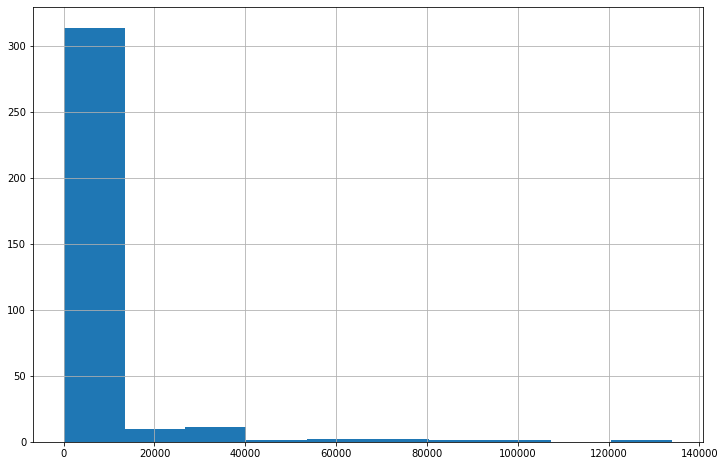

In [347]:
df['wall_text_len_cnt'].hist(figsize=(12,8))

In [348]:
df.wall_text_len_cnt

0         188.0
1      103157.0
2          83.0
3        5593.0
4        2681.0
         ...   
420         0.0
421        23.0
422     33098.0
423       705.0
424       929.0
Name: wall_text_len_cnt, Length: 425, dtype: float64

#### Задание 2 [1]

Вывести имена самых больших любителей мемов (топ 1\% значений по колонке `likes_memes`. Итоговую табличку отсортировать по числу оставленных в группе лайков.

In [349]:
one_perc = int(len(df) * 0.01)
df.sort_values(by = ["likes_memes"], ascending=False)[0:one_perc][['first_name', 'likes_memes']]

,first_name,likes_memes
134,Полина,1081.0
363,Николь,685.0
205,Александр,440.0
189,Данил,398.0


#### Задание 3 [1]

Построить гистограммы для параметров `wall_emoji_cnt` (число эмодзи на стене у человека) и `wall_comment_cnt` (число коментов на стене у человека). Где больше выбросов?

array([[<AxesSubplot:title={'center':'wall_emoji_cnt'}>,
        <AxesSubplot:title={'center':'wall_comment_cnt'}>]], dtype=object)

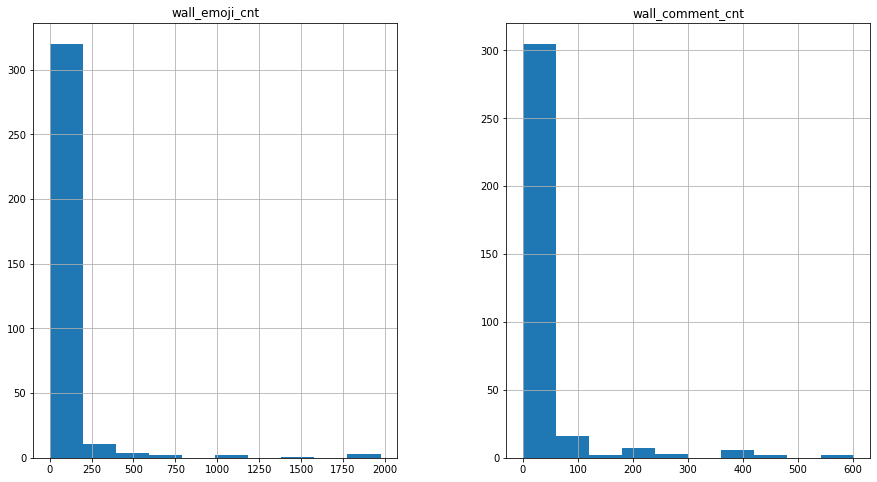

In [350]:
df[['wall_emoji_cnt', 'wall_comment_cnt']].hist(figsize=(15,8))

По  гистаграммам посчитать выбросы довольно сложно, построим ящики с усами

In [351]:
import seaborn as sns

<AxesSubplot:xlabel='wall_emoji_cnt'>

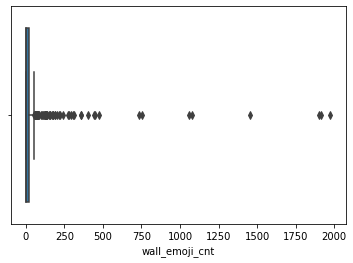

In [352]:
sns.boxplot(df['wall_emoji_cnt'])

<AxesSubplot:xlabel='wall_comment_cnt'>

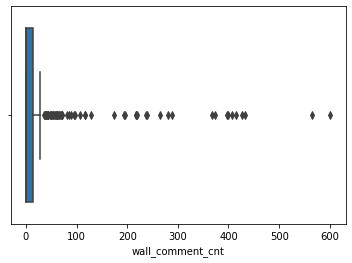

In [353]:
sns.boxplot(df['wall_comment_cnt'])

Для наглядности можно логарифмировать значения и построить ящики

<AxesSubplot:>

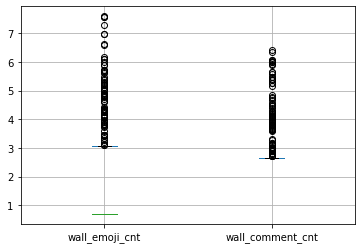

In [354]:
np.log(df[['wall_emoji_cnt', 'wall_comment_cnt']]).boxplot()

Все равно не очень наглядно, посмотрим аналитически. Будем считать, что выбросы находятся за пределами квартилей 0.25 и 0.75.

In [355]:
# Получение количества выбросов в выбранной колонке
def get_outliers_number(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    df['Outlier'] = ~df[column].between(q1, q3)
    return len(df[df['Outlier'] == True])

In [356]:
get_outliers_number(df, 'wall_emoji_cnt')

168

In [357]:
get_outliers_number(df, 'wall_comment_cnt')

165

Итого: чуть больше выбросов в wall_emoji_cnt, но разница на уровне погрешности (еще я посмотрел с другими квантилями, там вообще одинаковое было количество)

Сравните для обоих показателей средние с медианами. Какие выводы о хвостах распределений и выбросах можно сделать из этого сравнения?

In [358]:
df['wall_emoji_cnt'].mean()

62.90962099125365

In [359]:
df['wall_emoji_cnt'].median()

2.0

In [360]:
df['wall_comment_cnt'].mean()

29.632653061224488

In [361]:
df['wall_comment_cnt'].median()

0.0

Значения смещены к нулю, хвосты положительные. Большое различие между средним и медианой, выбросы портят значение средней.

#### Задание 4 [1]

Посчитайте соотношение полов в направлениях по маркетингу и менеджменту (`is_bmm` - с маркетинга - $1$, с менеджмента - $0$). Проинтерпретируйте итоговые показатели. Где больше парней? Во сколько раз?

<AxesSubplot:>

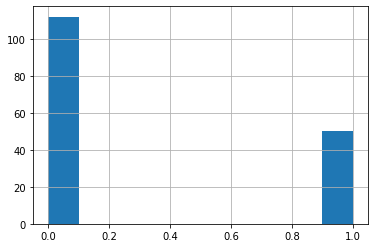

In [362]:
df['male_dummy'][df['is_bmm'] == True].hist()

<AxesSubplot:>

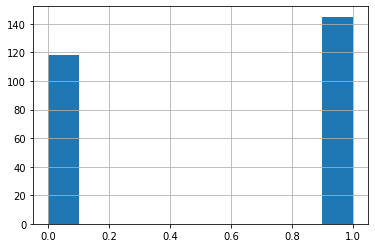

In [363]:
df['male_dummy'][df['is_bmm'] == False].hist()

In [364]:
len(df[(df.is_bmm == False) & (df.male_dummy == True)]) / len(df[(df.is_bmm == True) & (df.male_dummy == True)])

2.9

Больше парней на менеджменте почти в 3 раза

#### Задание 5 [2]

Каждый студент добавляет к себе в друзья людей со своего потока. В переменной `friends_mail_from_course_pct` записана доля парней-друзей с потока (то, что переменная называется не `male` - опечатка).

Постройте гистограмму для распределения доли парней в друзьях для девушек и для парней. Обе гистограммы постройте на одной картинке.

In [365]:
from matplotlib import pyplot as plt

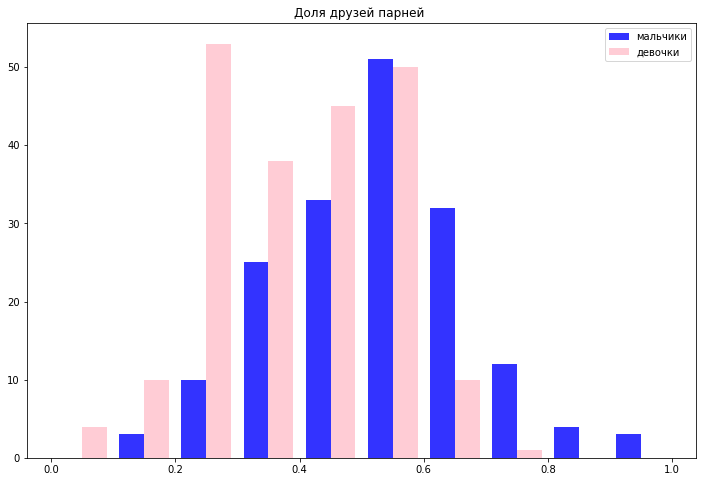

In [366]:
boys_photo = df['photo_month_mean'][df.male_dummy == True]
girls_photo = df['photo_month_mean'][df.male_dummy == False]
colors = ['blue', 'pink']
plt.rcParams["figure.figsize"] = (12,8)
plt.hist([df['friends_mail_from_course_pct'][df.male_dummy == True], df['friends_mail_from_course_pct'][df.male_dummy == False]], color=colors, alpha=0.8, label=['мальчики', 'девочки'])
plt.title("Доля друзей парней ")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Доля друзей парней у парней')

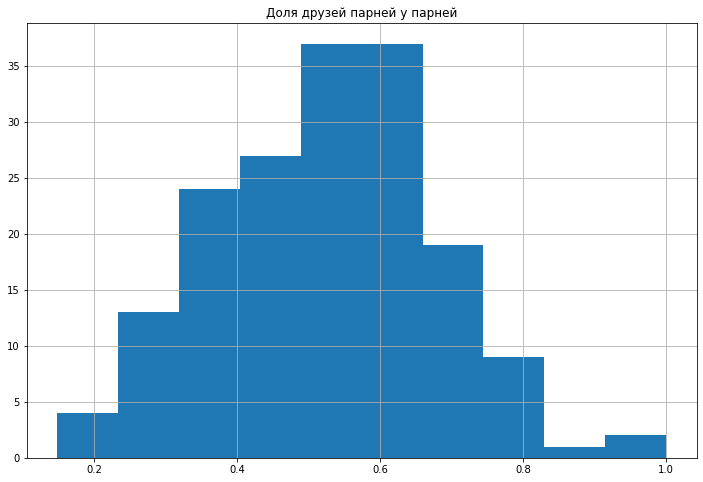

In [367]:
df['friends_mail_from_course_pct'][df.male_dummy == True].hist()
plt.title('Доля друзей парней у парней')

Text(0.5, 1.0, 'Доля друзей парней у девушек')

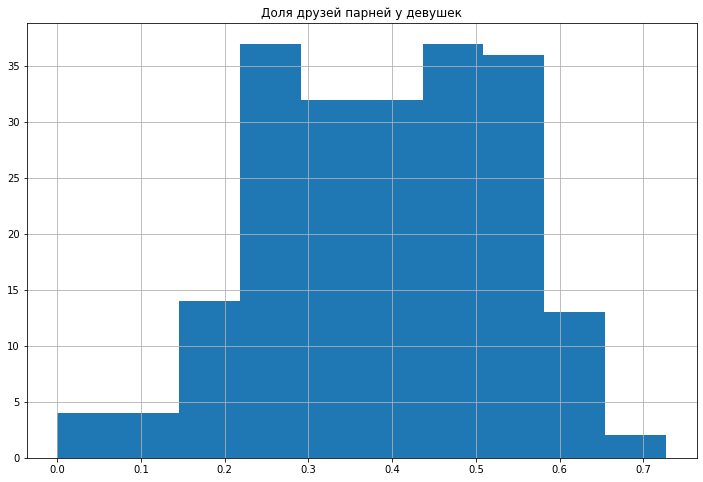

In [368]:
df['friends_mail_from_course_pct'][df.male_dummy == False].hist()
plt.title('Доля друзей парней у девушек')

Посчитайте для обеих групп среднее и дисперсию. Какие выводы вы можете сделать на основе посчитанных статистик?

In [369]:
df['friends_mail_from_course_pct'][df.male_dummy == False].mean()

0.3915219303663434

In [370]:
df['friends_mail_from_course_pct'][df.male_dummy == False].var()

0.019619921629458366

In [371]:
df['friends_mail_from_course_pct'][df.male_dummy == True].mean()

0.5230066008581026

In [372]:
df['friends_mail_from_course_pct'][df.male_dummy == True].var()

0.0234967542277464

Девочки в среднем больше дружат вк с девочками, мальчики в среднем добавляют в друзья примерно столько же девочек, сколько мальчиков

#### Задание 6 [3]

Давайте проанализируем колонку со средним кол-во фото в месяц (`photo_month_mean`)

* Постройте на одной картинке гистограмы для распределения этого показателя по разным полам. 
* Правда ли, что типичная девушка выкладывает значительно больше фотографий, чем типичный мужчина? (подумайте какой именно показатель типичности нужно выбрать для сравнения и обоснуйте почему)
* Для какого пола показатель оказывается более непредсказуемым? (подумайте как именно корректно эту непредсказуемость оценить, обычное стандартное отклонение явно не подходит)

Не забывайте подгрузить пакет `matplotlib`!  Все свои рассуждения пишите прямо по ходу кода

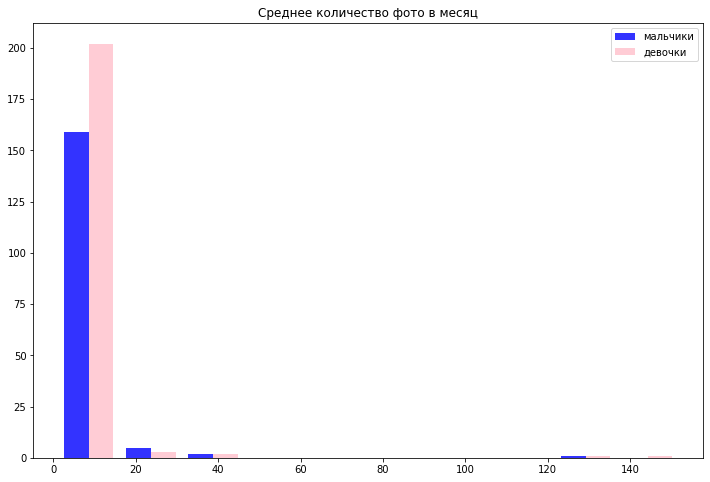

In [373]:
boys_photo = df['photo_month_mean'][df.male_dummy == True]
girls_photo = df['photo_month_mean'][df.male_dummy == False]
colors = ['blue', 'pink']
plt.rcParams["figure.figsize"] = (12,8)
plt.hist([boys_photo, girls_photo], color=colors, alpha=0.8, label=['мальчики', 'девочки'])
plt.title("Среднее количество фото в месяц")
plt.legend()
plt.show()

In [374]:
girls_photo.describe()

count    209.000000
mean       4.453513
std       14.076101
min        1.000000
25%        1.000000
50%        1.750000
75%        3.333333
max      151.833333
Name: photo_month_mean, dtype: float64

In [375]:
boys_photo.describe()

count    167.000000
mean       4.040629
std       11.327306
min        1.000000
25%        1.000000
50%        1.500000
75%        2.683333
max      131.416667
Name: photo_month_mean, dtype: float64

Типичность пользователя определим по медиане, в таком случае типичная девушка выкладывает примерно столько же фотографий, сколько типичный парень.

<AxesSubplot:>

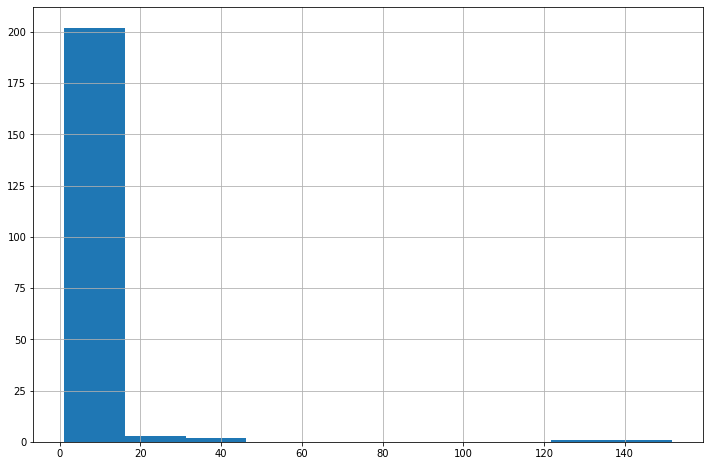

In [376]:
girls_photo.hist()

<AxesSubplot:>

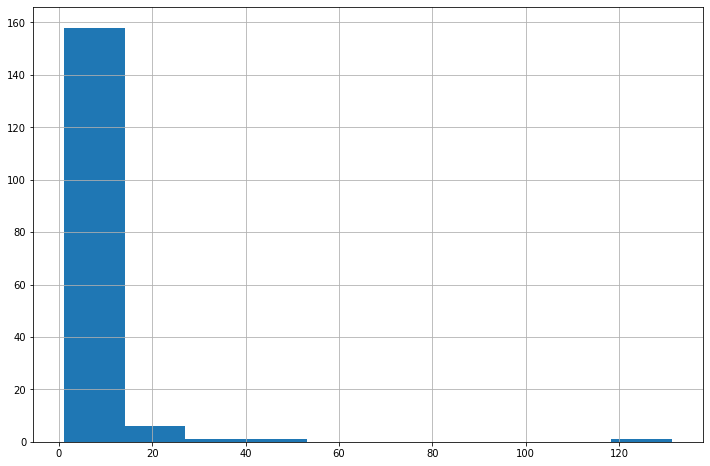

In [377]:
boys_photo.hist()

In [378]:
get_outliers_number(df[df['male_dummy'] == 1], 'photo_month_mean')

70

In [379]:
get_outliers_number(df[df['male_dummy'] == 0], 'photo_month_mean')

73

<AxesSubplot:>

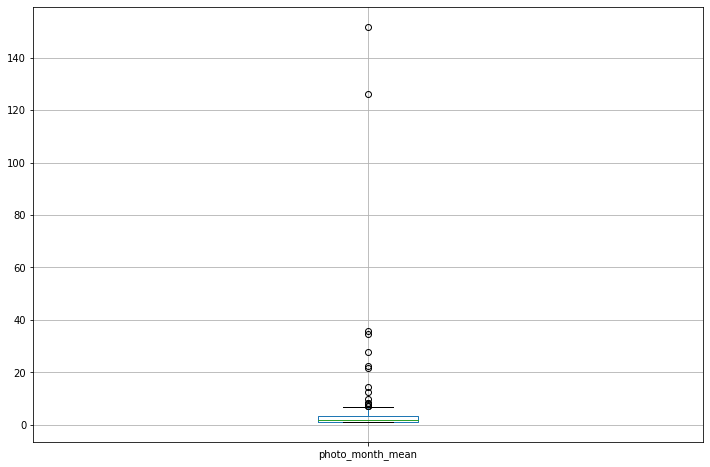

In [380]:
pd.DataFrame(girls_photo).boxplot()

<AxesSubplot:>

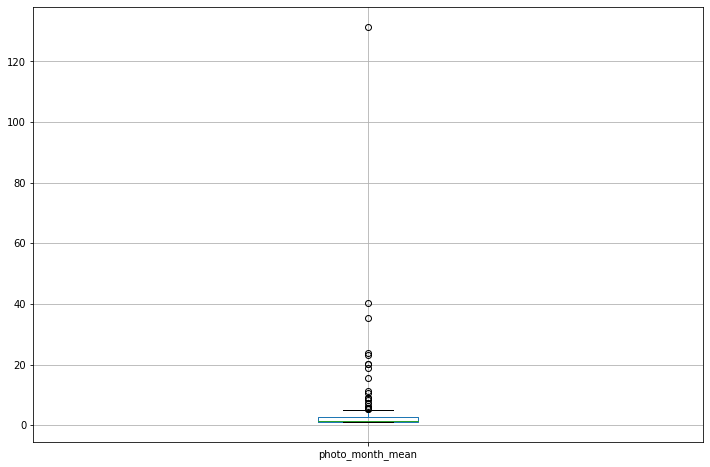

In [381]:
pd.DataFrame(boys_photo).boxplot()

In [382]:
len(boys_photo)

195

In [383]:
len(girls_photo)

230

In [384]:
len(girls_photo) / len(boys_photo)

1.1794871794871795

In [385]:
len(boys_photo) / len(girls_photo)

0.8478260869565217

кто-то в чате предположил, что из-за того, что девочек в датасете больше, мы можем быть более уверены в их предсказаниях. Мне кажется, что если мы дропнем случайное число девочек из датасета, принципиальной разницы в выбросах не будет

In [386]:
remove_n = len(girls_photo) - len(boys_photo)
drop_indices = np.random.choice(girls_photo.index, remove_n, replace=False)
girls_subset = girls_photo.drop(drop_indices)

In [387]:
get_outliers_number(pd.DataFrame(girls_subset), 'photo_month_mean')

61

<AxesSubplot:>

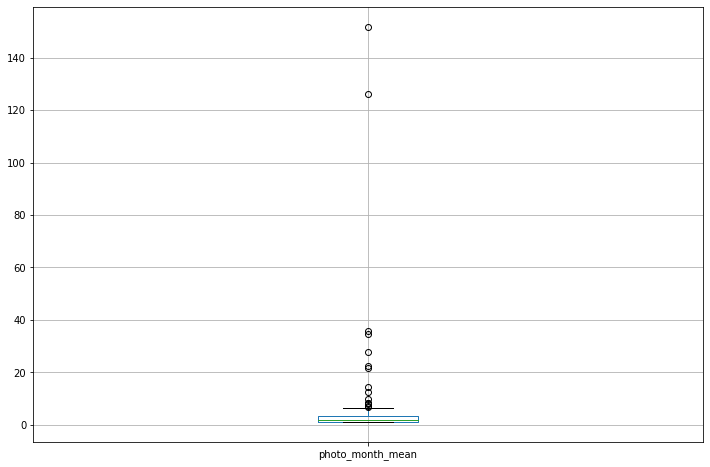

In [388]:
pd.DataFrame(girls_subset).boxplot()

Принципиальной разницы по полам не замечено, но из-за большего числа девочек в датасете, уверенности в предсказании их значений больше

### Визуализация

У всех нас есть датасет по контакту. В нём лежит информация про всех нас. Эту информацию надо как следует проанализировать. 

В большинстве заданий для получения баллов придётся не только завести код, но и написать свои мысли в поле Ответ. Сочинения надо писать прямо в текстовых ячейках, сразу после слова Ответ.

Для начала подгрузите все необходимые библиотеки: math, numpy, pandas, matplotlib.pyplot, seaborn и включите опцию, отвечающую за прорисовку картинок прямо в тетрадке.

In [389]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Подгрузите данные профилей и данные по фотографиям

In [390]:
# В этой табличке лежат данные по профилю человека
df_profile = pd.read_csv('./vk_data_profile.csv',sep='\t')

# В этой табличке лежат данные по фотографиям человека
df_photo = pd.read_csv('./vk_data_photo.csv',sep='\t')

Склеим табличку по полю uid

In [391]:
df = pd.merge(df_profile, df_photo, how='right', on='uid')
df.head()

,Unnamed: 0_x,uid,Unnamed: 0.1,first_name,last_name,is_closed,city,home_town,male_dummy,relation_cat,...,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text,photo_text_len_cnt,photo_yer_mean,vk_photo_ava_change_cnt,vk_photo_text_url_len_cnt,vk_photo_wall_ph_post_cnt
0,0,182152789,0,Александра,Абашкова,False,Москва,Москва,0,не указано,...,0.0,0.0,0.000000,0.0,,0.0,1.333333,0.0,0.0,0.0
1,1,148020433,1,Анастасия,Чуфистова,False,Рязань,Рязань,0,не указано,...,2.0,1.0,0.105263,0.0,,0.0,3.166667,0.0,0.0,0.0
2,2,138413935,2,Александр,Головачев,False,Москва,Омск,1,не женат/не замужем,...,0.0,0.0,0.000000,0.0,,0.0,2.333333,0.0,0.0,0.0
3,3,366261055,3,Анна,Лобанова,False,NaN,NaN,0,не указано,...,0.0,0.0,0.000000,0.0,,0.0,12.500000,0.0,0.0,0.0
4,4,111252392,4,Алексей,Пузырный,False,NaN,NaN,1,NaN,...,0.0,0.0,0.000000,0.0,,0.0,8.750000,0.0,0.0,0.0


Давайте посмотрим на все названия колонок, которые есть в таблице.

In [392]:
df.columns

Index(['Unnamed: 0_x', 'uid', 'Unnamed: 0.1', 'first_name', 'last_name',
       'is_closed', 'city', 'home_town', 'male_dummy', 'relation_cat',
       'relation_partner', 'byear', 'bmonth', 'bday', 'country',
       'facebook_dummy', 'instagram_dummy', 'skype_dummy', 'twitter_dummy',
       'home_phone_dummy', 'mobile_phone_dummy', 'site_dummy', 'folowers_cnt',
       'university_str', 'faculty_str', 'about_str', 'activities_str',
       'books_str', 'interests_str', 'movies_str', 'music_str', 'quotes_str',
       'tv_str', 'games_str', 'can_post_dummy', 'can_see_all_posts_dummy',
       'can_see_audio_dummy', 'can_write_private_message_dummy',
       'has_mobile_dummy', 'has_ava_dummy', 'wall_comments_dummy',
       'albums_cnt', 'audio_cnt', 'followers_cnt', 'friends_cnt', 'gifts_cnt',
       'groups_cnt', 'mutual_friends_cnt', 'photos_cnt', 'subscriptions_cnt',
       'user_photos_cnt', 'videos_cnt', 'pages_cnt', 'alco_love_cat',
       'smoke_love_cat', 'religion_str', 'inspired_by

Мы видим, что часть из них кончается на `cnt`. Это колонки-счётчики. В них лежат такие переменные как количество фоток, лайков, репостов и тд

In [393]:
variables_cnt = [item for item in df.columns if item[-3:] == 'cnt']
variables_cnt

['folowers_cnt',
 'albums_cnt',
 'audio_cnt',
 'followers_cnt',
 'friends_cnt',
 'gifts_cnt',
 'groups_cnt',
 'mutual_friends_cnt',
 'photos_cnt',
 'subscriptions_cnt',
 'user_photos_cnt',
 'videos_cnt',
 'pages_cnt',
 'lang_cnt',
 'change_city_school_cnt',
 'schools_cnt',
 'photo_cnt',
 'photo_like_cnt',
 'photo_repost_cnt',
 'photo_text_len_cnt',
 'vk_photo_ava_change_cnt',
 'vk_photo_text_url_len_cnt',
 'vk_photo_wall_ph_post_cnt']

Разбиритесь как работает и устроен этот цикл, если вы ещё не разбираетесь. Почитать об этом можно [вот тут.](https://habr.com/ru/post/30232/) Чуть ниже вам предстоит написать свой такой. 

#### Задание 7 [2]

Вытащите из переменных счётчиков только те, которые отвечают за фото.__ Постройте для них гистограммы (для удобства используйте логарифмическое скалирование). Как думаете, в каких переменных есть выбросы? Какие из переменных неинформативны? Почему?


__Ответ:__ выбросы есть почти во всех переменных (далее у меня есть и боксплоты, и результаты функции get_outliers). Не информативны переменные, в которых все или почти все строки имеют одно и то же значение, потому что тогда в переменных нет смысла, они не влиюят ни на что. text_url_count для меня вообще загадка, думал мало ли от чего зависит url фотографии. нашел на хабре статью про это, убедился, что никакой полезной инфы из этого извлечь не удастся (https://habrastorage.org/r/w1560/files/998/c21/bce/998c21bcecb0454aa81a61af5b62ea2f.png)

In [394]:
photos_var_cnt = [item for item in variables_cnt if 'photo' in item]  # сохраните нужные названия столбцов сюда

In [395]:
photos_var_cnt

['photos_cnt',
 'user_photos_cnt',
 'photo_cnt',
 'photo_like_cnt',
 'photo_repost_cnt',
 'photo_text_len_cnt',
 'vk_photo_ava_change_cnt',
 'vk_photo_text_url_len_cnt',
 'vk_photo_wall_ph_post_cnt']

In [396]:
# примерно такая картинка должна получиться

In [397]:
df['vk_photo_ava_change_cnt'].value_counts()

0.0    376
Name: vk_photo_ava_change_cnt, dtype: int64

In [398]:
df['vk_photo_wall_ph_post_cnt'].value_counts()

0.0    376
Name: vk_photo_wall_ph_post_cnt, dtype: int64

In [399]:
df['vk_photo_text_url_len_cnt'].value_counts()

0.0    361
1.0      6
3.0      2
2.0      2
5.0      2
9.0      1
4.0      1
6.0      1
Name: vk_photo_text_url_len_cnt, dtype: int64

In [400]:
df['photo_text_len_cnt'].value_counts()

0.0     373
40.0      1
43.5      1
2.0       1
Name: photo_text_len_cnt, dtype: int64

In [401]:
for col in photos_var_cnt:
    print(get_outliers_number(df, col))

216
339
216
237
103
52
49
64
49


array([[<AxesSubplot:title={'center':'photos_cnt'}>,
        <AxesSubplot:title={'center':'user_photos_cnt'}>,
        <AxesSubplot:title={'center':'photo_cnt'}>],
       [<AxesSubplot:title={'center':'photo_like_cnt'}>,
        <AxesSubplot:title={'center':'photo_repost_cnt'}>,
        <AxesSubplot:title={'center':'photo_text_len_cnt'}>],
       [<AxesSubplot:title={'center':'vk_photo_ava_change_cnt'}>,
        <AxesSubplot:title={'center':'vk_photo_text_url_len_cnt'}>,
        <AxesSubplot:title={'center':'vk_photo_wall_ph_post_cnt'}>]],
      dtype=object)

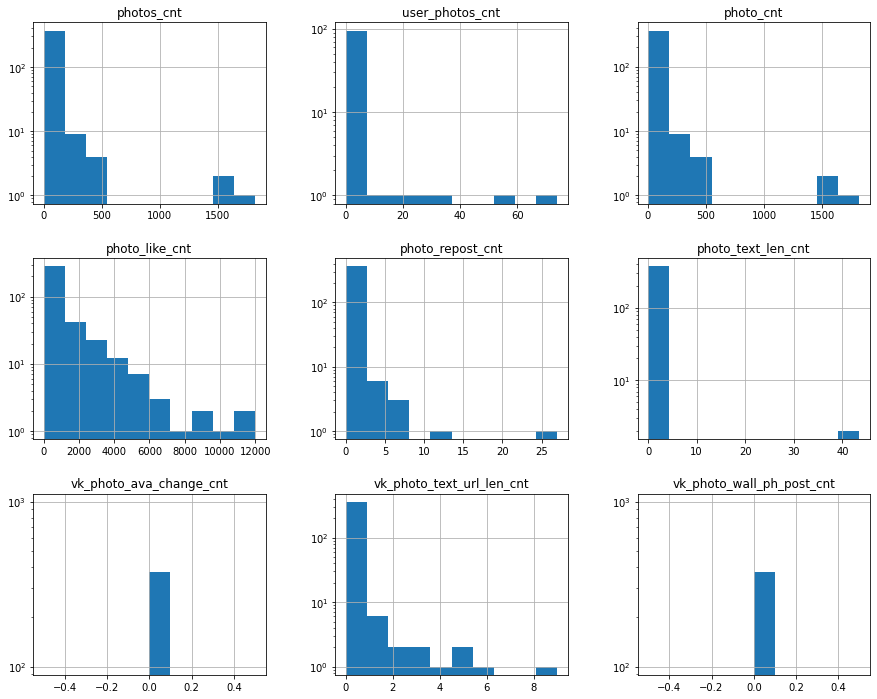

In [402]:
df[photos_var_cnt].hist(figsize=(15,12), log=True)

In [403]:
from matplotlib.pyplot import figure

<AxesSubplot:>

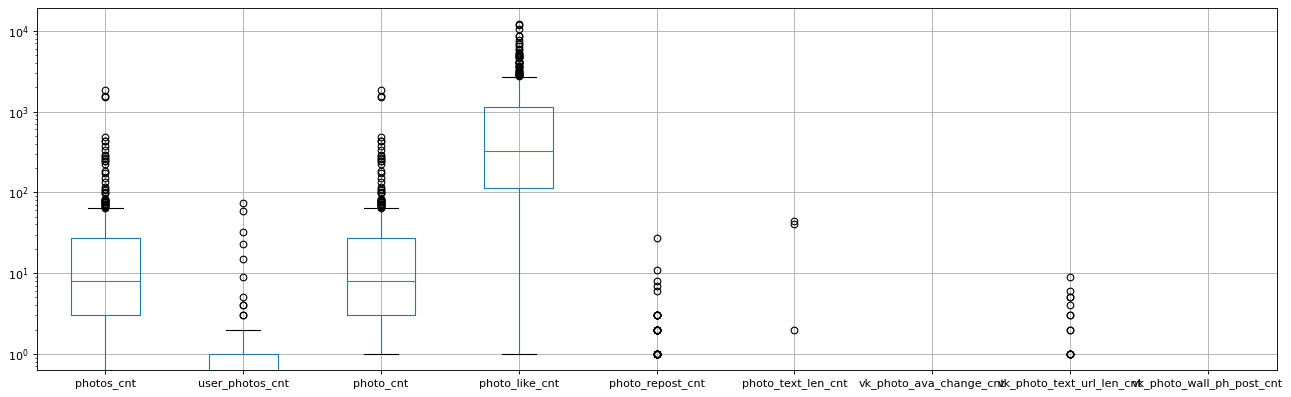

In [404]:
figure(figsize=(20, 6), dpi=80)
plt.yscale('log')
df[photos_var_cnt].boxplot(figsize=(22,6))

#### Задание 8 [2]

Кто больше постит фотографий, девушки или парни? чьи фото собирают больше лайков? (общее количество лайков, медиана и среднее)

Вы уже до этого искали ответы на подобные вопросы. Тут от вас требуется построить картинку, на которй будет чётко видно что происходит с женщинами, а что с мужчинами (своя гистограмма для каждой фичи раскрашенная по мужчинам и женщинам). Попробуйте построить все $4$ картинки в рамках одной с помощью `axis`.

In [405]:
# примерно такая картинка должна получиться

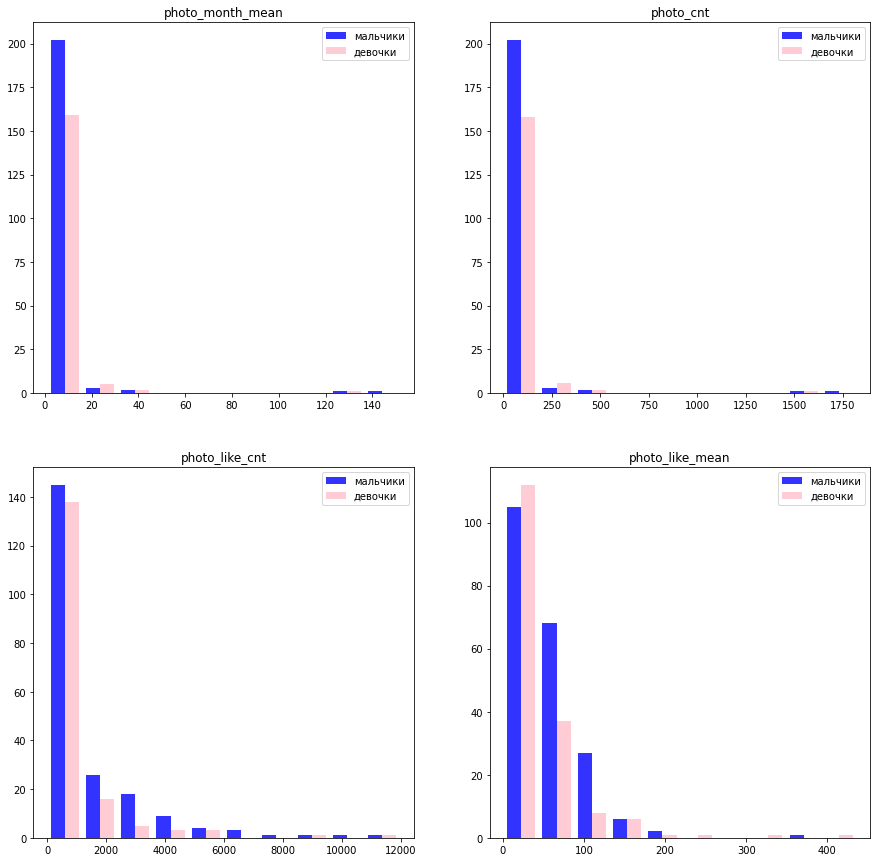

In [406]:
photo_cols = ['photo_month_mean', 'photo_cnt', 'photo_like_cnt', 'photo_like_mean']
f, axs = plt.subplots(2,2,figsize=(15,15))
for count, value in enumerate(photo_cols):
    plt.subplot(2, 2, count+1)
    plt.title(value)
    plt.hist([df[value][df.male_dummy == False], df[value][df.male_dummy == True]], color=colors, alpha=0.8, label=['мальчики', 'девочки'])
    plt.legend()

plt.show()

Давайте добавим к нашим переменным (описывающим фотографии) количество друзей, количество подарков и пол

In [407]:
vars_interesting = photos_var_cnt + ['male_dummy', 'friends_cnt', 'gifts_cnt']

In [408]:
vars_interesting

['photos_cnt',
 'user_photos_cnt',
 'photo_cnt',
 'photo_like_cnt',
 'photo_repost_cnt',
 'photo_text_len_cnt',
 'vk_photo_ava_change_cnt',
 'vk_photo_text_url_len_cnt',
 'vk_photo_wall_ph_post_cnt',
 'male_dummy',
 'friends_cnt',
 'gifts_cnt']

In [409]:
df[vars_interesting].head()

,photos_cnt,user_photos_cnt,photo_cnt,photo_like_cnt,photo_repost_cnt,photo_text_len_cnt,vk_photo_ava_change_cnt,vk_photo_text_url_len_cnt,vk_photo_wall_ph_post_cnt,male_dummy,friends_cnt,gifts_cnt
0,4.0,NaN,4.0,309.0,0.0,0.0,0.0,0.0,0.0,0,298.0,NaN
1,19.0,NaN,19.0,2894.0,2.0,0.0,0.0,0.0,0.0,0,408.0,203.0
2,7.0,NaN,7.0,2406.0,0.0,0.0,0.0,0.0,0.0,1,2969.0,NaN
3,50.0,NaN,50.0,1310.0,0.0,0.0,0.0,0.0,0.0,0,214.0,24.0
4,35.0,NaN,35.0,1375.0,0.0,0.0,0.0,0.0,0.0,1,336.0,227.0


#### Задание 9 [2]

Визуализируйте вытащенные признаки попарно. Постройте `pairplot` для всех пар. На диагонали расположите оценки плотностей для признаков. Для этого используйте опцию `diag_kind = 'kde'`. С помощью параметра `hue` разбейте все наблюдения на мужские и женские, чтобы они отражались на картинках разными цветами.

In [410]:
vars_interesting = ['photo_cnt', 'photo_like_cnt', 'photo_like_median', 'photo_like_mean', 'male_dummy', 'friends_cnt', 'gifts_cnt'] # в примере колонок меньше

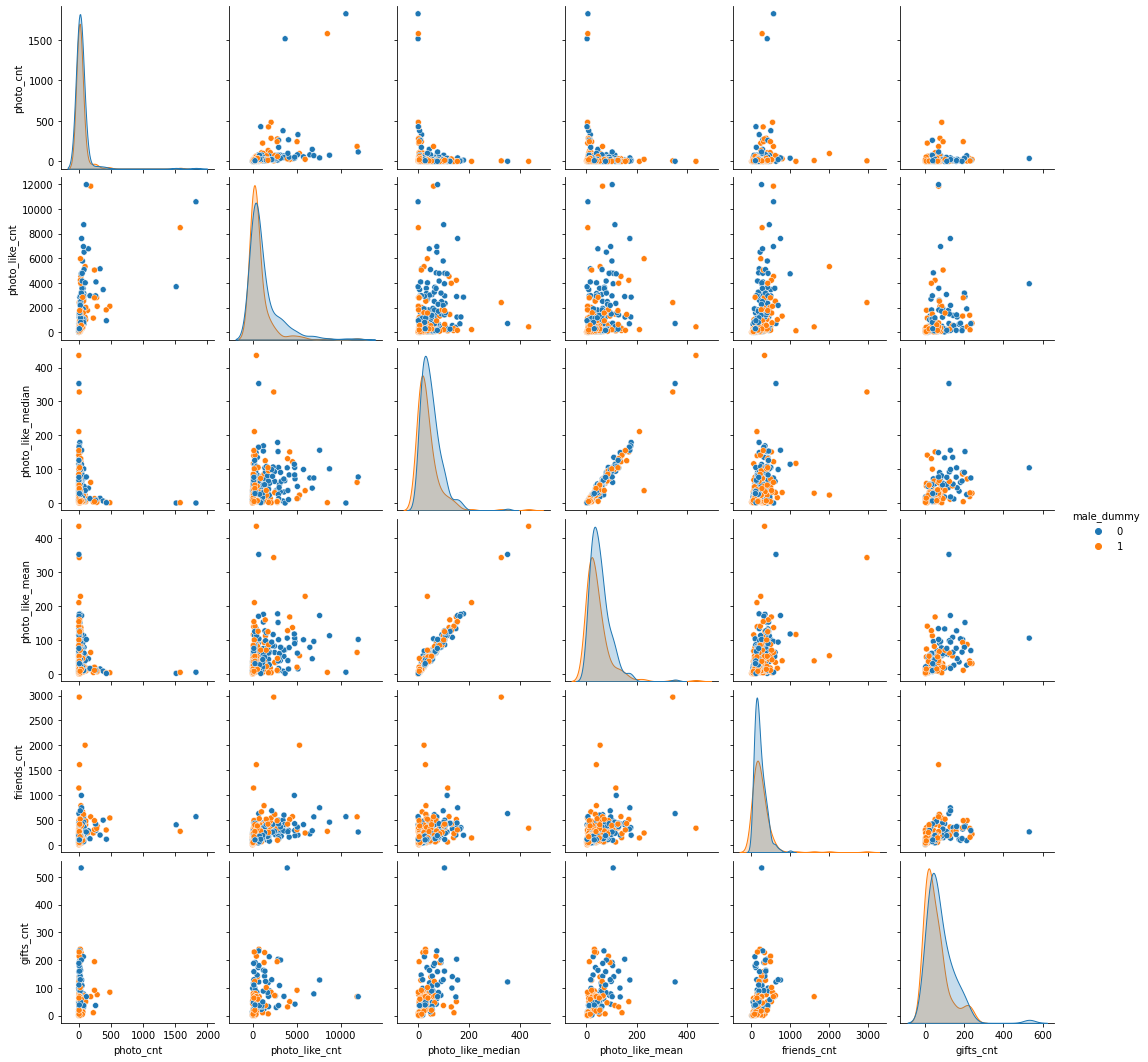

In [411]:
sns.pairplot(df[vars_interesting], hue="male_dummy")

Давайте для удобства визуализации прологарифмуем наш датасет (предварительно заполнив пропуски нулями или выкинув их)

In [412]:
df_na_zero = df[vars_interesting].fillna(0)

for column in df_na_zero.columns:
    if column == 'male_dummy':
        continue
    df_na_zero[column] = df_na_zero[column].map(lambda x: math.log(1 + x))
    

# постройте pairplot для датасета df_na_zero

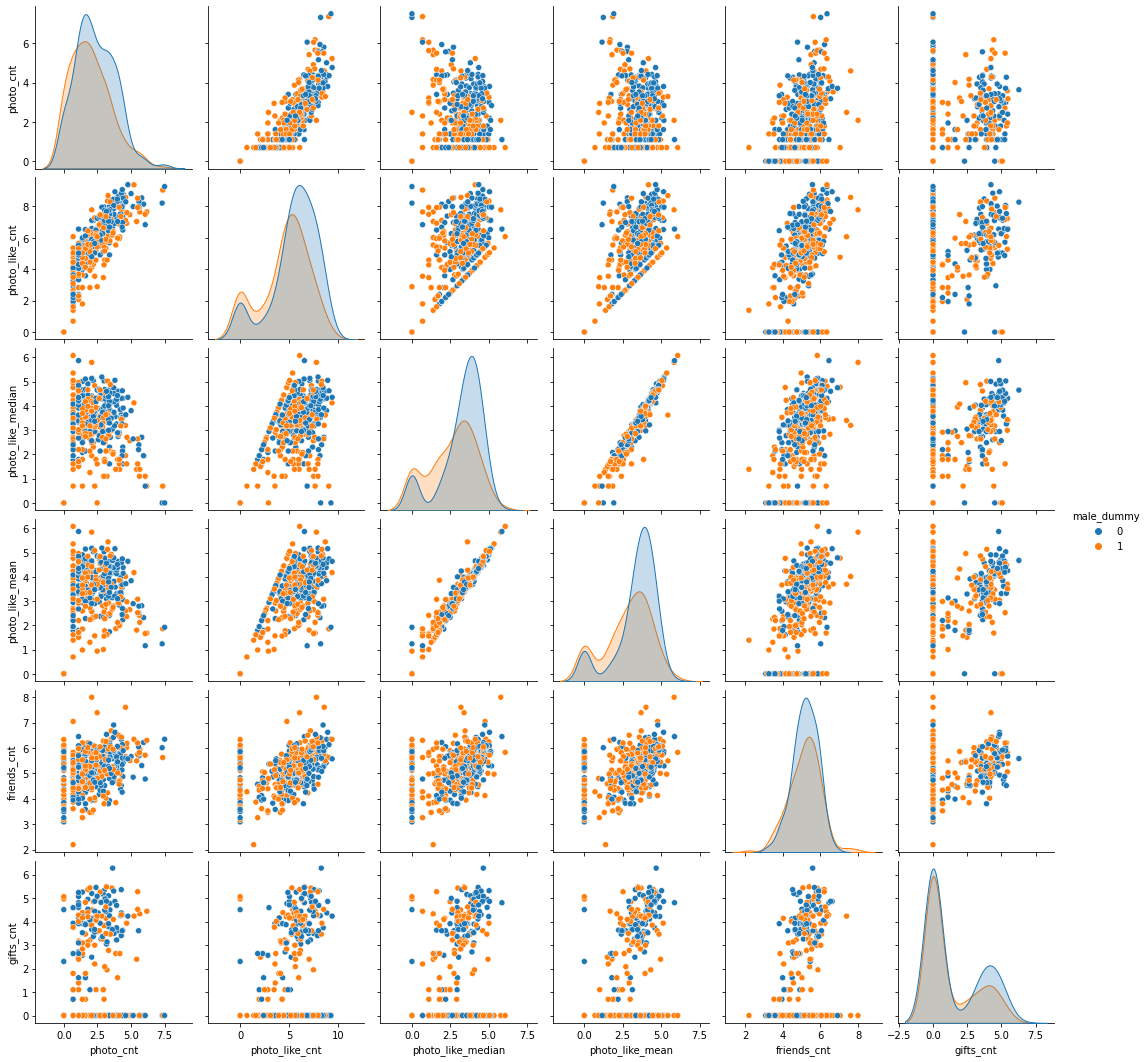

In [413]:
sns.pairplot(df_na_zero, hue="male_dummy")

#### Задание 10 [1]

Сделайте датасет df_na_drop. Для этого проделайте всё то же самое, что выше, но вместо того, чтобы заполнять пропуски нулями - выбросите их.

In [414]:
# создание датасета для df_na_drop
    
# постройте pairplot для датасета df_na_drop

In [415]:
df_na_drop = df[vars_interesting].dropna()
df_na_drop

,photo_cnt,photo_like_cnt,photo_like_median,photo_like_mean,male_dummy,friends_cnt,gifts_cnt
1,19.0,2894.0,152.0,152.315789,0,408.0,203.0
3,50.0,1310.0,25.0,26.200000,0,214.0,24.0
4,35.0,1375.0,19.0,39.285714,1,336.0,227.0
11,7.0,181.0,20.0,25.857143,0,92.0,11.0
12,56.0,1076.0,14.5,19.214286,0,104.0,36.0
...,...,...,...,...,...,...,...
412,5.0,265.0,53.0,53.000000,1,408.0,19.0
414,244.0,2790.0,4.0,11.434426,1,490.0,194.0
416,22.0,1557.0,37.0,70.772727,1,520.0,101.0
417,2.0,152.0,76.0,76.000000,0,189.0,110.0


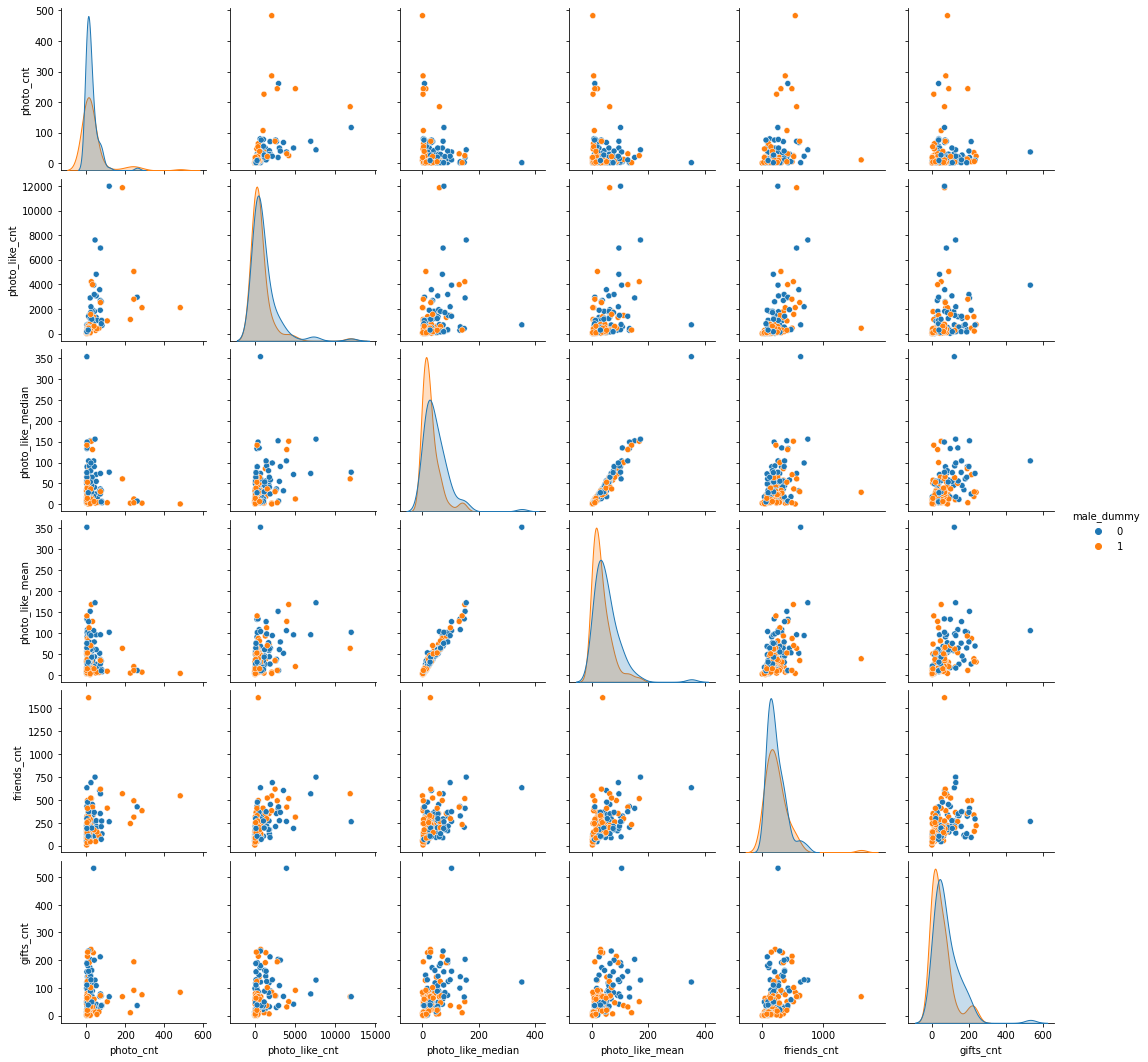

In [416]:
sns.pairplot(df_na_drop, hue="male_dummy")

In [417]:
df_na_drop.corr().unstack().sort_values(ascending=False).drop_duplicates()

photo_cnt          photo_cnt            1.000000
photo_like_median  photo_like_mean      0.981279
photo_like_cnt     photo_cnt            0.466128
friends_cnt        photo_like_mean      0.419026
                   photo_like_cnt       0.406936
gifts_cnt          photo_like_mean      0.404581
                   photo_like_median    0.386483
photo_like_median  friends_cnt          0.369818
photo_like_mean    photo_like_cnt       0.349446
photo_like_median  photo_like_cnt       0.298197
photo_cnt          friends_cnt          0.276312
friends_cnt        gifts_cnt            0.271125
photo_like_cnt     gifts_cnt            0.237264
male_dummy         photo_cnt            0.091670
gifts_cnt          photo_cnt            0.073435
friends_cnt        male_dummy           0.032982
male_dummy         photo_like_cnt      -0.111393
photo_cnt          photo_like_mean     -0.130369
                   photo_like_median   -0.145937
male_dummy         gifts_cnt           -0.197444
                   p

In [418]:
df_na_drop.corr(method='spearman').unstack().sort_values(ascending=False).drop_duplicates()

photo_cnt          photo_cnt            1.000000
photo_like_median  photo_like_mean      0.973177
photo_like_cnt     photo_cnt            0.846256
friends_cnt        photo_like_cnt       0.635967
gifts_cnt          photo_like_mean      0.603161
photo_like_median  gifts_cnt            0.551808
friends_cnt        photo_like_mean      0.544575
photo_like_cnt     gifts_cnt            0.537607
                   photo_like_mean      0.520769
gifts_cnt          friends_cnt          0.486702
friends_cnt        photo_like_median    0.450107
photo_like_median  photo_like_cnt       0.437861
friends_cnt        photo_cnt            0.394556
gifts_cnt          photo_cnt            0.264514
photo_like_mean    photo_cnt            0.047461
male_dummy         friends_cnt         -0.008868
photo_cnt          photo_like_median   -0.035839
                   male_dummy          -0.087639
male_dummy         photo_like_cnt      -0.224886
                   gifts_cnt           -0.264899
                   p

#### Задание 11 [3]

Дайте ответы на следущие вопросы. Свои мысли пишите прямо здесь! 

* Между какими признаками скорее всего есть линейная зависимость? Почему вы так решили? 

__Ответ:__  между количеством фото и количеством лайков под фото, количетством лайков под фото и количеством друзей, количество фото и количеством друзей (здесь мы еще и нашли связь двух переменных через третью). Решил я так по графику - если точечки выстраиваются в подобие прямой под наклоном, то видна линейная зависимость.

* Eсть ли тут нелинейные зависимости?

__Ответ:__ да (точечки выстраиваются не в виде прямой, а в виде кривой)

* Есть ли объекты-выбросы, которые наблюдаются далеко от сгустков из точек. 

__Ответ:__  да

* Какие ещё интересные особенности вы видите на картинке?

__Ответ:__  в df_na_zero хорошо видно, что если дропнуть наны, то мы увидим линейную зависомость, а нули ее портят. еще можно анализировать выбросы в зависимости от распределения - в like_median/like_mean есть пример выброса, который вписывается в распределение, так что может это и не выброс, просто надо его отскалировать

#### Задание 12 [2]

Отлично! Половина домашки осталась позади. Давайте теперь для тех же самых признаков построим матрицу корреляций и провизуализируем её с помощью `heatmap`.

In [419]:
# Тут нужна картинка для датасета df[vars_interesting]

In [420]:
vars_interesting = ['photo_cnt', 'photo_like_cnt', 'photo_like_median', 'photo_like_mean', 'male_dummy', 'friends_cnt', 'gifts_cnt']

<AxesSubplot:>

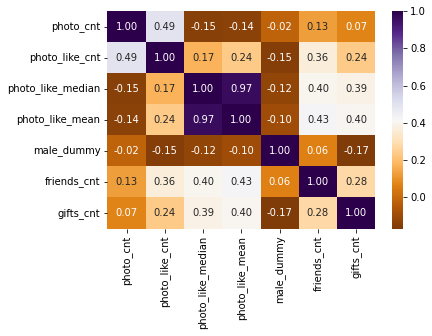

In [421]:
sns.heatmap(df[vars_interesting].corr(), annot=True, fmt='.2f', cmap='PuOr')

In [422]:
# примерно такая картинка должна получиться

In [423]:
# Тут нужна картинка для датасета df_na_zero[vars_interesting]

<AxesSubplot:>

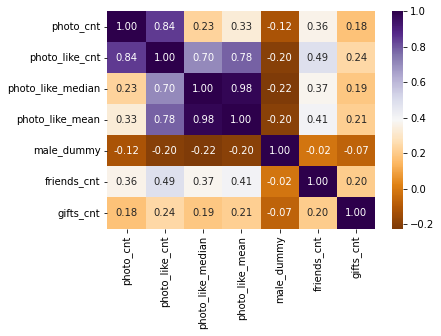

In [424]:
sns.heatmap(df_na_zero[vars_interesting].corr(), annot=True, fmt='.2f', cmap='PuOr')

In [425]:
# Тут нужна картинка для датасета df_na_drop[vars_interesting]

<AxesSubplot:>

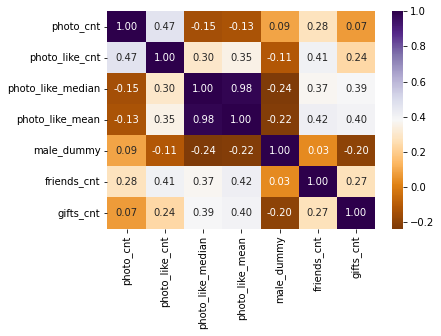

In [426]:
sns.heatmap(df_na_drop[vars_interesting].corr(), annot=True, fmt='.2f', cmap='PuOr')

#### Задание 13 [2]

Насколько сильно корреляционные матрицы различаются между собой? Почему? 

__Ответ:__ Довольно похожи дефолтная матрица и с дропнутыми нанами, матрица с заполненными нулями нанами дает корреляцию больше. В заполнении нулями есть смысл, если мы выдвигаем гипотезу о происхождении нанов, как о нулевом значении объекта, но количество фото можно быть не доступно в скрытом аккаунте например, я бы заполнял такой нан средним и значением или бы пробовал предсказать его по другим столбцам (knn imputer, linear regression)

#### Задание 14 [2]

Между какими переменными корреляция самая высокая? Почему? Она отрицательная или положительная. Прокомментируйте все клетки, где она оказалась $\ge 0.3$ либо $\le -0.2$. 

__Ответ:__ Самая высокая корреляция между photo_like столбцами, колонки результат feature engineering имеют парную корреляцию это классика (корреляция положительная). -0.2 у мэйл дамми, но там вообще-то категориальный признак, этот метод корреляции для него не корректен (для категориальных хи квадрат например).

#### Задание 15 [2]

Дамми-переменная это переменная, которая принимает два значения. Либо $1$, если человек обладает закодированным в ней свойством, либо $0$, если не обладает. В нашей таблице все дамми-переменные оканчиваются на суффикc `dummy`.  

Возьмите переменную `instagram_dummy`. Она принимает значение $1$, если у пользователя на страничке есть ссылка на инстаграм. Возьмите переменную `male_dummy`. Она примает значение $1$, если пользователь парень. Постройте картинку, на которой будет видно как между собой соотносятся владельцы инстаграмма по полу. 

In [427]:
# примерно такая картинка должна получиться

In [428]:
df.groupby('male_dummy').instagram_dummy.value_counts()

male_dummy  instagram_dummy
0           0                  174
            1                   56
1           0                  168
            1                   27
Name: instagram_dummy, dtype: int64

<AxesSubplot:title={'center':'Наличие инстаграма на страничке'}, xlabel='instagram_dummy', ylabel='Count'>

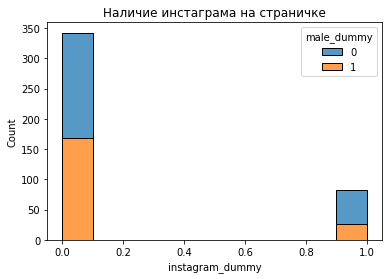

In [429]:
plt.title("Наличие инстаграма на страничке")
sns.histplot(data=df, x="instagram_dummy", hue="male_dummy", multiple="stack")

Правда ли, что девушки чаще указывают наличие инстаграма на своей страничке?

__Ответ:__   правда

#### Задание 16 [1]

Категориальная переменная обычно принимает значения из какого-то фиксированного множества. Например, переменная `political_cat` описывает к какой категории относятся политические взгляды юзера. Постройте для этой переменной столбиковую диаграмму. Разберитесь по [документации](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) как сделать у столбиков горизонтальное расположение. Можно ли сделать исходя из картинки вывод, что в вышке одни либералы? Почему?

__Ответ:__  нельзя, в вышке не одни либералы, больше всего людей (из тех, кто указал взгляды) с умеренными взглядами. из-за того, что даже участник онлайн курсов анализирует странички вконтакте, современные жители России не склонны вообще распросраняться в интернете о своих взглядах в открытую.

In [430]:
# примерно такая картинка должна получиться

<AxesSubplot:title={'center':'Политические взгляды'}, xlabel='Count', ylabel='political_cat'>

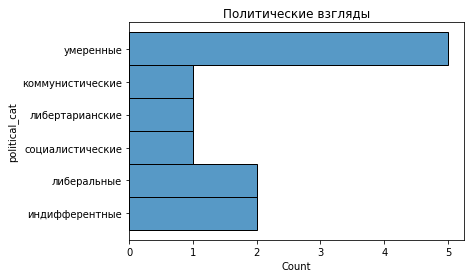

In [431]:
plt.title("Политические взгляды")
sns.histplot(data=df, y="political_cat", )

#### Задание 17 [1]

Как политические взгляды распределены по полам?  Постройте для этого также столбиковую диаграмму, на которой каждый стобик будет разбит на два цвета: мужчины и женщины. 

__Ответ:__  у парней взгляды разнообразнее (на 1 категорию), они чаще указывают предпочтения (7 против 5). на самом деле маловато данных, а большинство парней не указали предпочтения, как и девушки

In [432]:
# примерно такая картинка должна получиться

<AxesSubplot:title={'center':'Политические взгляды с фильтрацией по полу'}, xlabel='political_cat', ylabel='Count'>

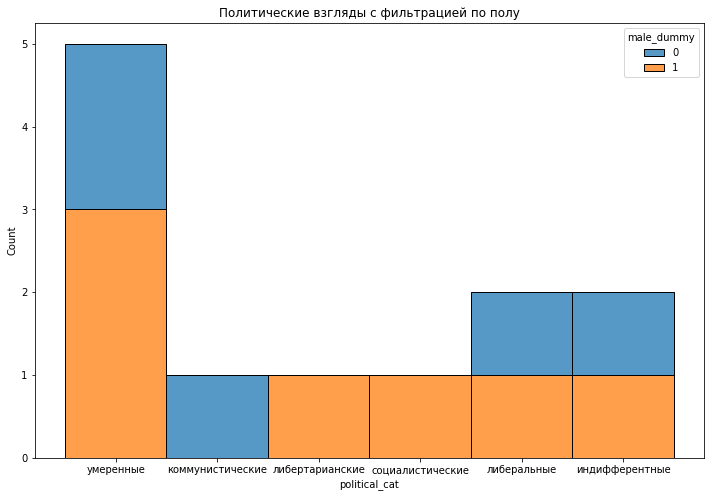

In [444]:
plt.figure(figsize = (12,8))
plt.title("Политические взгляды с фильтрацией по полу")
sns.histplot(data=df, x="political_cat", hue='male_dummy', multiple="stack")

#### Задание 18 [2]

Есть ли связь между неграмотностью и рождаемостью? Для 94 стран, уровень неграмотности женщин в которых больше 5%, известны доля неграмотных среди женщин старше 15 (на 2003 год) и средняя рождаемость на одну женщину (на 2005 год).

illiteracy.txt - датасет

Чему равен выборочный коэффициент корреляции Пирсона между этими двумя признаками? Округлите до четырёх знаков после десятичной точки.

In [496]:
illiteracy = pd.read_fwf('illiteracy.txt')
illiteracy.to_csv('illiteracy.csv', index=False)

В общем при обработке txt файла были проблемы в строках 20, 21, 31 плюс появился мнимый столбцец.
Можно было поправить это вручную (я так и сделал сначала), но если б наш датасет был огромный, такой трюк бы не прошел.
Ниже моя обработка ошибок с помощью регулярных выражений

In [547]:
import re

In [633]:
illiteracy = pd.read_csv('illiteracy.csv', sep='\t')
illiteracy = illiteracy.rename(columns={"Births,Unnamed: 1": "Births"})
sad_list = ['Illit', 'Births'] # sad потому что огромное количество времени потратил на это

def get_value(col_value, country, num):
    float_list = re.findall("\d+\.\d+", country ) # ищем все float числа
    if len(float_list) == 0:
        return col_value
    return float_list[num]

illiteracy['Births'] = illiteracy['Births'].str.replace(r',', '')

for num, col in enumerate(sad_list):
    illiteracy[col] = illiteracy.apply(lambda x: get_value(x[col], x.Country, num), axis=1)
    illiteracy[col] = illiteracy[col].astype('float')

illiteracy

,Country,Illit,Births
0,Albania,20.5,1.78
1,Algeria,39.1,2.44
2,Bahrain,15.0,2.34
3,Belize,5.9,2.97
4,Benin,73.5,5.60
...,...,...,...
89,Venezuela,6.9,2.65
90,Vietnam,8.5,1.78
91,Yemen,69.8,5.87
92,Zambia,25.2,5.40


In [634]:
illiteracy[['Illit', 'Births']].corr(method='pearson')

,Illit,Births
Illit,1.000000,0.768663
Births,0.768663,1.000000


Ответ: 0.7687

Чему равен выборочный коэффициент корреляции Спирмена признаков из предыдущего вопроса? Округлите до четырёх знаков после десятичной точки.

In [635]:
illiteracy[['Illit', 'Births']].corr(method='spearman')

,Illit,Births
Illit,1.000000,0.752962
Births,0.752962,1.000000


Ответ: 0.7530